Correlating cardiovascular risk factors and chances of getting a Heart Attack

In [66]:
#Import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

In [67]:
#Vijay - Original Clean Up
#Bring in the data CSV
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')

cardio_df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [68]:
#Vijay - Original Clean Up
#Clean up age & drop the unneeded ID column
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)

# Convert to US understood numbers & add column for BMI
weight_upd = round(cardio1_df['weight']*2.2)
height_upd = round(cardio1_df['height'].div(2.54))

cardio1_df.update(weight_upd)
cardio1_df.update(height_upd)
cardio1_df.head()

cardio1_df["BMI"] = (cardio1_df['weight']*703)/(cardio1_df["height"]*cardio1_df["height"])
cardio1_df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108


In [69]:
#Vijay - Original Clean Up
#Get Heart attack group data
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
7,62.0,2,70.0,209.0,130,90,3,3,0,0,1,1,29.985102
15,46.0,2,68.0,246.0,120,80,1,1,0,0,0,1,37.400087


In [70]:
#Vijay - Original Clean Up
#Group by No Heart Attack
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108
5,60.0,1,59.0,147.0,120,80,2,2,0,0,0,0,29.687159
6,61.0,1,62.0,205.0,130,80,3,1,0,0,1,0,37.490895
8,48.0,1,62.0,156.0,110,70,1,1,0,0,1,0,28.529657


Ttest_indResult(statistic=64.7610700531675, pvalue=0.0)

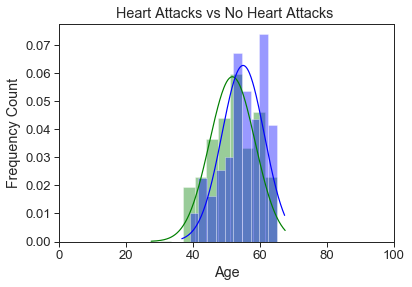

In [71]:
#Vijay - Comparing No Heart Attack group to Heart Attack group 

ax0 = sns.distplot(cardio_0["age"], bins=10, fit=stats.norm, kde=False, label = "Age- No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(cardio_1["age"], bins=10, fit=stats.norm, kde=False, label = "Age- Attack", color ="b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
ax0.set(xlabel='Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart AttacksS ")
ax1.set(xlabel='Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart Attacks ")

#Set x limits
ax0.set(xlim = [0,100])
ax1.set(xlim = [0,100])

#Save the figure
ax0.figure.savefig("SBP.png")
ax1.figure.savefig("SBP.png")
stats.ttest_ind(cardio_1['age'], cardio_0['age'], equal_var=False)


- Based on the Pvalue and the frequency count we can infer that the populations of heart attack
  and no heart attack individuals belong to 2 seperate population groups.
    


In [72]:
#Vijay - Creating 4 df.
cardio_1.age.value_counts()
young_age1= cardio_1[cardio_1.age <= 50]
old_age1 = cardio_1[(cardio_1.age >50) & (cardio_1.age<= 80)]
young_age0= cardio_0[cardio_0.age <= 50]
old_age0 = cardio_0[(cardio_0.age >50) & (cardio_0.age<= 80)]

Ttest_indResult(statistic=-21.923388608851653, pvalue=2.624156463009305e-105)

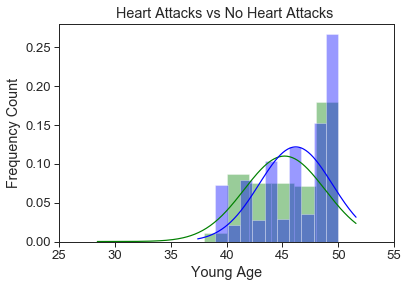

In [73]:
#Vijay - Comparing No Heart Attack group to Heart Attack group fro young age

ax0 = sns.distplot(young_age0['age'], bins=10, fit=stats.norm, kde=False, label = "Age- No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(young_age1['age'], bins=10, fit=stats.norm, kde=False, label = "Age- Attack", color ="b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
ax0.set(xlabel='Young Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart Attacks")
ax1.set(xlabel='Young Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart Attacks ")

#Set x limits
ax0.set(xlim = [25,55])
ax1.set(xlim = [25,55])

#Save the figure
ax0.figure.savefig("SBP.png")
ax1.figure.savefig("SBP.png")
stats.ttest_ind(young_age0['age'], young_age1['age'], equal_var=False)


- Based on the graph we can see that there is a higher frequency of individuals who have had heart attacks. 
- We can also infer based on the graph that those individuals are older in age. 

Ttest_indResult(statistic=-34.675502194249596, pvalue=6.1639792497485655e-260)

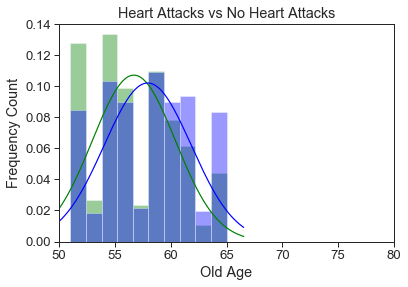

In [74]:
#Vijay - Comparing No Heart Attack group to Heart Attack group for old age

ax0 = sns.distplot(old_age0['age'], bins=10, fit=stats.norm, kde=False, label = "Age- No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(old_age1['age'], bins=10, fit=stats.norm, kde=False, label = "Age- Attack", color ="b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
ax0.set(xlabel='Old Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart Attacks")
ax1.set(xlabel='Old Age', ylabel='Frequency Count', title = "Heart Attacks vs No Heart Attacks")

#Set x limits
ax0.set(xlim = [50,80])
ax1.set(xlim = [50,80])

#Save the figure
ax0.figure.savefig("SBP.png")
ax1.figure.savefig("SBP.png")


stats.ttest_ind(old_age0['age'], old_age1['age'], equal_var=False)


- Based on the graph it shows that the majority of the population of old age who have had heart attacks are older then the population who haven't. 

In [75]:
#Vijay
#Expected for chi for Gender - no Heart Attack
Female_noattack = len(cardio_0[cardio_0["gender"] == 1])
Female_noattack

Male_noattack = len(cardio_0[cardio_0["gender"] == 2])
Male_noattack

#Create expected series
expected=pd.Series([Female_noattack, Male_noattack],index = ['Women', 'Men'])
expected


Women    22914
Men      12107
dtype: int64

In [77]:
#Vijay
#Expected for chi for Gender - Heart Attack
Female_attack = len(cardio_1[cardio_1["gender"] == 1])
Female_attack

Male_attack = len(cardio_1[cardio_1["gender"] == 2])
Male_attack

#Create expected series
observed=pd.Series([Female_attack, Male_attack],index = ['Women', 'Men'])
observed

Women    22616
Men      12363
dtype: int64

In [87]:
gender_df = pd.DataFrame([observed,expected]).T
gender_df.columns = ['Observed','Expected']
gender_df

,Observed,Expected
Women,22616,22914
Men,12363,12107


In [88]:
stats.chisquare(gender_df['Observed'], gender_df['Expected'])

Power_divergenceResult(statistic=9.288601428510882, pvalue=0.002305841381905467)

In [15]:
#Kendall
#Clean Cardio0 to remove outliers - negative and impossibly high BPs
cardio_0 = cardio_0[cardio_0['ap_lo'] >= 50]
cardio_0 = cardio_0[cardio_0['ap_lo'] < 200]
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108
5,60.0,1,59.0,147.0,120,80,2,2,0,0,0,0,29.687159
6,61.0,1,62.0,205.0,130,80,3,1,0,0,1,0,37.490895
8,48.0,1,62.0,156.0,110,70,1,1,0,0,1,0,28.529657


In [16]:
#Kendall
#Clean Cardio1 to remove outliers - negative and impossibly high BPs
cardio_1 = cardio_1[cardio_1['ap_lo'] >= 50]
cardio_1 = cardio_1[cardio_1['ap_lo'] < 200]
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
7,62.0,2,70.0,209.0,130,90,3,3,0,0,1,1,29.985102
15,46.0,2,68.0,246.0,120,80,1,1,0,0,0,1,37.400087


In [17]:
#Kendall
#DBP ttest comparison for heart attack vs no heart attack
stats.ttest_ind(cardio_0['ap_lo'], cardio_1['ap_lo'], equal_var = False)

Ttest_indResult(statistic=-93.4076197256065, pvalue=0.0)

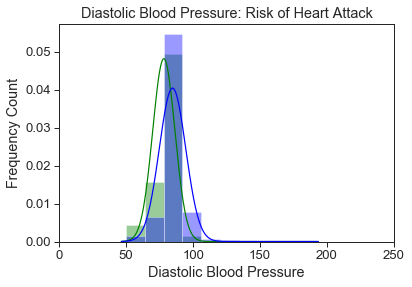

In [18]:
#Kendall
#Display the bell curve
cardio0_dbp = sns.distplot(cardio_0['ap_lo'], fit = norm, label = "DBP Heart ", color = "g", bins = 10, kde = False, fit_kws={"color":"green"})
cardio1_dbp = sns.distplot(cardio_1['ap_lo'], fit = norm, label = "DBP Non Heart Attack", color = "b", bins = 10, kde = False, fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
cardio0_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")
cardio1_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")

#Set x limits
cardio0_dbp.set(xlim = [0,250])
cardio1_dbp.set(xlim = [0,250])

#Save the figure
cardio0_dbp.figure.savefig("DBP.png")
cardio1_dbp.figure.savefig("DBP.png")

In [19]:
#Kendall
#Find 1,2,3 Category Totals

#Get sums of 3 categories for No Heart Attack
cat1_0 = cardio_0[cardio_0['gluc']==1].count()
print(cat1_0['gluc'])
cat2_0 = cardio_0[cardio_0['gluc']==2].count()
print(cat2_0['gluc'])
cat3_0 = cardio_0[cardio_0['gluc']==3].count()
print(cat3_0['gluc'])

#Get sums of 3 categories for Yes Heart Attack
cat1_1 = cardio_1[cardio_1['gluc']==1].count()
print(cat1_1['gluc'])
cat2_1 = cardio_1[cardio_1['gluc']==2].count()
print(cat2_1['gluc'])
cat3_1 = cardio_1[cardio_1['gluc']==3].count()
print(cat3_1['gluc'])

30734
2091
2003
27900
2994
3245


In [20]:
#Kendall
#Create Chi Square DF
cs_data = pd.Series([cat1_0['gluc'], cat2_0['gluc'], cat3_0['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])
cs_exp = pd.Series([cat1_1['gluc'], cat2_1['gluc'], cat3_1['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])

cs_df = pd.DataFrame(cs_data)
cs_df[1] = cs_exp
cs_df

,0,1
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


In [21]:
#Kendall
#Run Chi Square
stats.chisquare(cs_df[0], cs_df[1])

Power_divergenceResult(statistic=1035.5834959331103, pvalue=1.3362911220535194e-225)

In [22]:
#Kendall
#Clean up chi data frame
cs_df.columns = ["No Heart Attack Glucose", "Heart Attack Glucose"]
cs_df

,No Heart Attack Glucose,Heart Attack Glucose
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


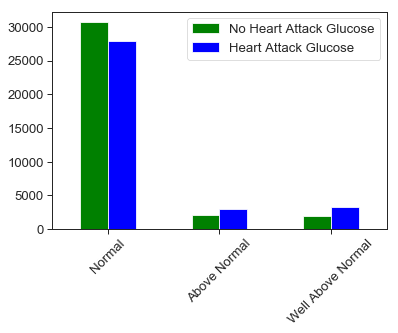

In [23]:
#Kendall
#Create bar graph for chi square for Glucose Levels
cardio_gluc = cs_df.plot.bar(rot=45, color = ["green", "blue"])

In [24]:
#Dinesh
#Cleaning up ap hi data
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()
cardio_1 = cardio_1[cardio_1['ap_hi']>=50]
cardio_1 = cardio_1[cardio_1['ap_hi']<200]

In [25]:
#Dinesh
#Cleaning up ap hi data for 0
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()
cardio_0 = cardio_0[cardio_0['ap_hi']>=50]
cardio_0 = cardio_0[cardio_0['ap_hi']<200]

In [26]:
#Dinesh
#ttest for SBP
stats.ttest_ind(cardio_0['ap_hi'], cardio_1['ap_hi'], equal_var = False)

Ttest_indResult(statistic=-126.69948484685598, pvalue=0.0)

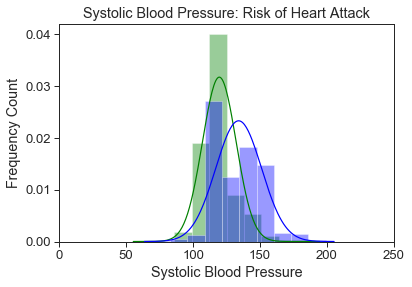

In [27]:
#Dinesh
#plot bell curve for SBP
ax0 = sns.distplot(cardio_0["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(cardio_1["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - Attack", color ="b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
ax0.set(xlabel='Systolic Blood Pressure', ylabel='Frequency Count', title = "Systolic Blood Pressure: Risk of Heart Attack")
ax1.set(xlabel='Systolic Blood Pressure', ylabel='Frequency Count', title = "Systolic Blood Pressure: Risk of Heart Attack")

#Set x limits
ax0.set(xlim = [0,250])
ax1.set(xlim = [0,250])

#Save the figure
ax0.figure.savefig("SBP.png")
ax1.figure.savefig("SBP.png")

In [28]:
#Dinesh
#Observed for cholesterol 

normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 1])
print(normal_chol_attack)

above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 2])
print(above_normal_chol_attack)

well_above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 3])
print(well_above_normal_chol_attack)

22895
5691
6127


In [29]:
#Dinesh
#Create series for cholesterol
observed_cholesterol=pd.Series([normal_chol_attack,above_normal_chol_attack, well_above_normal_chol_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
observed_cholesterol

normal cholesterol               22895
above normal cholesterol          5691
well above normal cholesterol     6127
dtype: int64

In [30]:
#Dinesh
#Expected for Cholesterol

normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 1])
print(normal_chol_no_attack)

above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 2])
print(above_normal_chol_no_attack)

well_above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 3])
print(well_above_normal_chol_no_attack)

29223
3780
1885


In [31]:
#Dinesh
#Created expected series for Cholesterol
expected_cholesterol=pd.Series([normal_chol_no_attack, above_normal_chol_no_attack, well_above_normal_chol_no_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
expected_cholesterol 

normal cholesterol               29223
above normal cholesterol          3780
well above normal cholesterol     1885
dtype: int64

In [32]:
#Dinesh
#Create cholesterol chi dataframe
df_chol = pd.DataFrame([observed_cholesterol,expected_cholesterol]).T
df_chol.columns = ['observed cholesterol','expected cholesterol']
df_chol

,observed cholesterol,expected cholesterol
normal cholesterol,22895,29223
above normal cholesterol,5691,3780
well above normal cholesterol,6127,1885


In [33]:
#Dinesh
#Run chi square for cholesterol
stats.chisquare(df_chol['observed cholesterol'], df_chol['expected cholesterol'])

Power_divergenceResult(statistic=11882.580754299395, pvalue=0.0)

In [34]:
#Vin
#Create expected for chi test
active_cardio_0 = len(cardio_0[cardio_0["active"] == 1])
inactive_cardio_0 = len(cardio_0[cardio_0["active"] == 0])
total_0 = len(cardio_0["active"])
print (inactive_cardio_0, active_cardio_0, total_0)
expected = pd.Series([active_cardio_0,inactive_cardio_0], index=["Active", "Inactive"])
print(expected)

6353 28535 34888
Active      28535
Inactive     6353
dtype: int64


In [35]:
#Vin
#Create observed for chi test
active_cardio_1 = len(cardio_1[cardio_1["active"] == 1])
inactive_cardio_1 = len(cardio_1[cardio_1["active"] == 0])
total_1 = len(cardio_1["active"])
print (inactive_cardio_1, active_cardio_1, total_1)
observed = pd.Series([active_cardio_1,inactive_cardio_1], index=["Active", "Inactive"])
print(observed)

7301 27412 34713
Active      27412
Inactive     7301
dtype: int64


In [36]:
#Vin
#Create dataframe for Chi test
activitylevel_df = pd.DataFrame([observed,expected]).T
activitylevel_df.columns = ['Observed','Expected']
activitylevel_df.head()

,Observed,Expected
Active,27412,28535
Inactive,7301,6353


In [37]:
#Vin
#Run chi square test for active lifestyle
stats.chisquare(activitylevel_df['Observed'], activitylevel_df['Expected'])

Power_divergenceResult(statistic=185.65722156681613, pvalue=2.82047450002704e-42)

In [38]:
#Adil
# Height
stats.ttest_ind(cardio_0['height'], cardio_1['height'], equal_var = False)

Ttest_indResult(statistic=3.0369016848180057, pvalue=0.0023911186695552964)

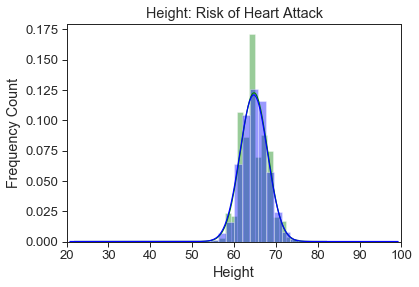

In [39]:
#Adil
#Create bell curve for height
height0 = sns.distplot(cardio_0['height'],fit=norm, kde=False, bins = 40, label = "height-No Heart Attack", color = "g", fit_kws={"color":"green"})
height1 = sns.distplot(cardio_1['height'],fit=norm, kde=False, bins = 40, label = "height-Heart Attack", color = "b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
height0.set(xlabel='Height', ylabel='Frequency Count', title = "Height: Risk of Heart Attack")
height1.set(xlabel='Height', ylabel='Frequency Count', title = "Height: Risk of Heart Attack")

#Set x limits
height0.set(xlim = [20,100])
height1.set(xlim = [20,100])

#Save the figure
height0.figure.savefig("Height.png")
height1.figure.savefig("Height.png")

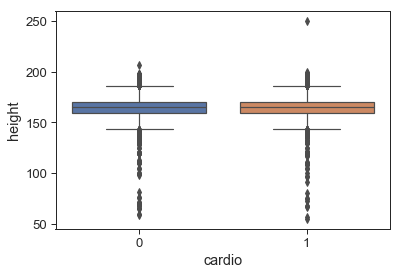

In [40]:
#Adil
# Box Plot
sns.boxplot(x='cardio',y='height', data=cardio_df)

In [41]:
#Adil
# BMI
stats.ttest_ind(cardio_0['BMI'], cardio_1['BMI'], equal_var = False)

Ttest_indResult(statistic=-44.17864038269167, pvalue=0.0)

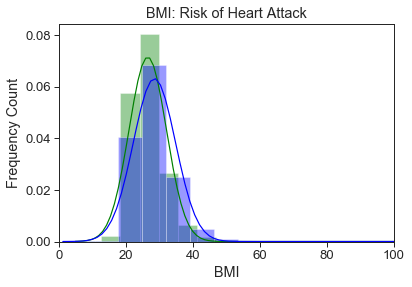

In [42]:
#Adil
#BMI bell curve
bmi0 = sns.distplot(cardio_0['BMI'],fit=norm, kde=False, bins = 40, label = "BMI-No Heart Attack", color = "g", fit_kws={"color":"green"})
bmi1 = sns.distplot(cardio_1['BMI'],fit=norm, kde=False, bins = 40, label = "BMI-Heart Attack", color = "b", fit_kws={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
bmi0.set(xlabel='BMI', ylabel='Frequency Count', title = "BMI: Risk of Heart Attack")
bmi1.set(xlabel='BMI', ylabel='Frequency Count', title = "BMI: Risk of Heart Attack")

#Set x limits
bmi0.set(xlim = [0,100])
bmi1.set(xlim = [0,100])

#Save the figure
bmi0.figure.savefig("BMI.png")
bmi1.figure.savefig("BMI.png")

In [43]:
#Adil
#Observed for chi for smoking
nosmoke_attack = len(cardio_1[cardio_1["smoke"] == 0])
print(nosmoke_attack)

smoke_attack = len(cardio_1[cardio_1["smoke"] == 1])
smoke_attack

#Create observed series
observed=pd.Series([nosmoke_attack,smoke_attack],index = ['non-smoking', 'smoking'])
observed

31812


non-smoking    31812
smoking         2901
dtype: int64

In [44]:
#Adil
#Expected for chi for smoking
nosmoke_noattack = len(cardio_0[cardio_0["smoke"] == 0])
nosmoke_noattack

smoke_noattack = len(cardio_0[cardio_0["smoke"] == 1])
smoke_noattack

#Create expected series
expected=pd.Series([nosmoke_noattack, smoke_noattack],index = ['non-smoking', 'smoking'])
expected

non-smoking    31659
smoking         3229
dtype: int64

In [45]:
#Adil
#Create chi dataframe for smoking
df = pd.DataFrame([observed,expected]).T
df.columns = ['observed','expected']
df

,observed,expected
non-smoking,31812,31659
smoking,2901,3229


In [46]:
#Adil
#Run chi test for smoking
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=34.05746571956968, pvalue=5.350821262191846e-09)

In [47]:
#Yannick
# T test of weight for both group (with heart attack and without heart attack)
stats.ttest_ind(cardio_0['weight'], cardio_1['weight'], equal_var=False)

Ttest_indResult(statistic=-48.39551830774373, pvalue=0.0)

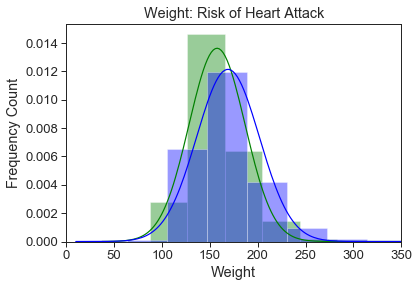

In [48]:
#Yannick
# Plot weight without heat attack (cardio_0) and with heart attack (cardio_1)
weight0 = sns.distplot(cardio_0["weight"], bins=10, fit=stats.norm, kde=False, label = "No Heart Attack", color = "g", fit_kws ={"color":"green"})
weight1 = sns.distplot(cardio_1["weight"], bins=10, fit=stats.norm, kde=False, label = "Heart Attack", color = "b", fit_kws ={"color":"blue"})

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
weight0.set(xlabel='Weight', ylabel='Frequency Count', title = "Weight: Risk of Heart Attack")
weight1.set(xlabel='Weight', ylabel='Frequency Count', title = "Weight: Risk of Heart Attack")

#Set x limits
weight0.set(xlim = [0,350])
weight1.set(xlim = [0,350])

#Save the figure
weight0.figure.savefig("Weight.png")
weight1.figure.savefig("Weight.png")

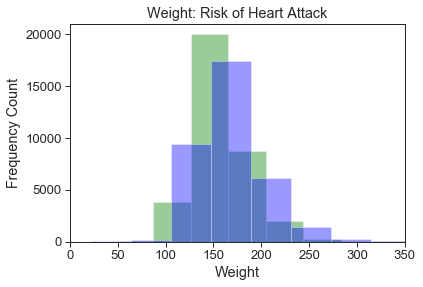

In [49]:
#Yannick
# Plot weight without heat attack (cardio_0) and with heart attack (cardio_1) not fit
w0 = sns.distplot(cardio_0["weight"], bins=10, kde=False, label = "No Heart Attack", color = "g")
w1 = sns.distplot(cardio_1["weight"], bins=10, kde=False, label = "Heart Attack", color = "b")

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
w0.set(xlabel='Weight', ylabel='Frequency Count', title = "Weight: Risk of Heart Attack")
w1.set(xlabel='Weight', ylabel='Frequency Count', title = "Weight: Risk of Heart Attack")

#Set x limits
w0.set(xlim = [0,350])
w1.set(xlim = [0,350])

#Save the figure
w0.figure.savefig("Weight2.png")
w1.figure.savefig("Weight2.png")

In [50]:
#Yannick
# Observed alcohol level (with heart attack)
alcoholic_attack = len(cardio_1[cardio_1["alco"] == 1 ])
print(alcoholic_attack)
nonealcoholic_attack = len(cardio_1[cardio_1["alco"] == 0 ])
print(nonealcoholic_attack)

1805
32908


In [51]:
#Yannick
#create dataframe for observed alcohol level(with heart attack)
observed_alcohol=pd.Series([alcoholic_attack, nonealcoholic_attack],index = ['Consume alcohol', 'Do not consume alcohol'])
observed_alcohol

Consume alcohol            1805
Do not consume alcohol    32908
dtype: int64

In [52]:
#Yannick
# Expected alcohol level (without heart attack)
alcoholic_no_attack = len(cardio_0[cardio_0["alco"] == 1 ])
print(alcoholic_no_attack)
nonealcoholic_no_attack = len(cardio_0[cardio_0["alco"] == 0 ])
print(nonealcoholic_no_attack)

1932
32956


In [53]:
#Yannick
#create dataframe for expected alcohol level (without heart attack)
expected_alcohol=pd.Series([alcoholic_no_attack, nonealcoholic_no_attack],index = ['Consume alcohol', 'Do not consume alcohol'])
expected_alcohol

Consume alcohol            1932
Do not consume alcohol    32956
dtype: int64

In [54]:
#Yannick
# create dataframe for both expected (without heart attack) and observed (with heart attack)
df_alco = pd.DataFrame([observed_alcohol,expected_alcohol]).T
df_alco.columns = ["Observed alcohol","Expected alcohol"]
df_alco

,Observed alcohol,Expected alcohol
Consume alcohol,1805,1932
Do not consume alcohol,32908,32956


In [55]:
#Yannick
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [56]:
#Yannick
# Run the chi square test with stats.chisquare()
stats.chisquare(df_alco['Observed alcohol'], df_alco['Expected alcohol'])

Power_divergenceResult(statistic=8.418255082314408, pvalue=0.003714721306198256)